# Neural Network from Scratch


## Import libraries

We will be using the lower resolution MINST data set

In [90]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

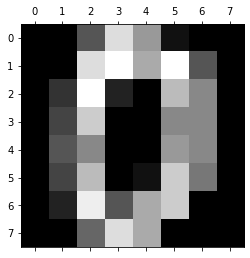

[0] 

Before Scaling: 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [91]:
# load all the digits (img)
digits = load_digits()

# load the data from the digit (img)
X = digits.data
y = digits.target
# print(X)
# print(y)
print("The shape of the digits dataset:") 
print(digits.data.shape)
# plot the digits
# using .gray()
# and .matshow() with argument digit.images[xx]
plt.figure(1, figsize=(6,4))
plt.matshow(digits.images[0], cmap='gray')

# plt.show()
plt.show()

# get the gt for this digit img
print(y[0:1],"\n")
print("Before Scaling: \n")

print(X[0,:])

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [92]:
# use the stander lib to scale the data
# init the scaler 
X_scale = StandardScaler()
# fit the data to the scaler 
X = X_scale.fit_transform(digits.data)
y = digits.target

# Looking the new features after scaling
print("After Scaling: \n")
print(X[0,:])


After Scaling: 

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [93]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

## 3) Setting up the output layer

### One hot encoding

In [94]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.

    y_vector = np.zeros((len(y),10))
    # print(y_vector)

    for i in range(len(y)):
      y_vector[i,y[i]]= 1
    return y_vector

y_vector = convert_y_to_vect(y)
print(y_vector)
# print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Converting the training and test targets to vectors 

In [95]:
# convert digits to vectors using the func above
# apply this to both train and test splits
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)




A quick check to see that our code performs as we expect 

In [96]:
print(y_train[0:4])
print(y_v_train[0:4])

[9 6 1 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 4) Creating the neural network

### The activation function and its derivative

In [97]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
def f(z):
    return 1/(1 + np.exp(-z))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def f_deriv(z):
    return f(z) * (1 - f(z))

In [98]:
# # tanh function activation function
# def f(z):
#     return (2/(1 + np.exp(-2*z))) - 1

# # The deriviative of the tanh function  
# def f_deriv(z):
#     return ((4 * np.exp(-2 * z))/(np.exp(-2*z) + 1)**2)

In [99]:
# # ReLU activation function
# def f(z):
#   return z * (z > 0)

# # # The deriviative of the ReLu function  
# def f_deriv(z):
#   return 1. * (z > 0)
#     

### Creating and initialing W and b


In [100]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    weights = {}
    #creating a dictionary for bias i.e. a set of key: value pairs
    bias = {}

    for i in range(1, len(nn_structure)):
        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        weights[i] = r.random_sample((nn_structure[i],nn_structure[i-1]))
        bias[i] = r.random_sample((nn_structure[i],))

        
    # Return weight and b
    return weights, bias

### Initializing $\triangledown W$ and $\triangledown b$


In [101]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
    dlt_W = {}
    dlt_b = {}    
    
    # use for loop to init the dlt W and dlt b
    # you can use np.zeros
    for i in range(1, len(nn_structure)):
      dlt_W[i] = np.zeros((nn_structure[i],nn_structure[i-1]))
      dlt_b[i] = np.zeros((nn_structure[i],))


    return  dlt_W, dlt_b

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [102]:
def feed_forward(x, W, b):
    # create a dictionary for holding the a values for all levels
    all_levels_dict = {1:x}

    # create a dictionary for holding the z values for all the layers
    all_layers_dict = {}

    # for each layer
    for i in range(1,len(W)+1): 
      if i == 1:
        get_node = x
      else:
        get_node = all_levels_dict[i]

        
      # z^(l+1) = W^(l)*a^(l) + b^(l)
      all_layers_dict[i+1] = W[i].dot(get_node) + b[i] 
      # a^(l+1) = f(z^(l+1))
      all_levels_dict[i+1] = f(all_layers_dict[i+1])

        
    return all_levels_dict, all_layers_dict

## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  



In [103]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l),delta_plus_1) * f_deriv(z_l)

## The Back Propagation Algorithm


In [104]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    # init W and b
    W, b = setup_and_init_weights(nn_structure) 
    # init counter to 0
    cnt = 0 
    # store the length of data
    y_len = len(y) 
    # init a list to store the all costs
    all_costs_list = [] 
    print('Starting gradient descent for {} iterations'.format(iter_num))
    print("alpha", alpha)
    # while the counter is less than the max iterations:
    while cnt < iter_num:
        # print the iteration number for every 1000 iter
        if cnt % 1000 ==0:
          print("Iteration",cnt,"of",iter_num)

        # init delt_W and delt_b
        delt_W, delt_b = init_tri_values(nn_structure)
        # init the cost to 0
        cost = 0
        N = len(y)
        
        # for each data:
        for i in range(N):
            dlt = {}
            
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            all_levels_dict, all_layers_dict = feed_forward(X[i,:],W,b)
            
            
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure),0,-1):
                if l == len(nn_structure):
                  dlt[l] = calculate_out_layer_delta(y[i,:],all_levels_dict[l],all_layers_dict[l])
                  cost += np.linalg.norm((y[i,:]-all_levels_dict[l]))
       
                else:
                  if l > 1:
                    dlt[l] = calculate_hidden_delta(dlt[l+1],W[l],all_layers_dict[l])
                  # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                      # hit: you can use np.newaxis to increase the number of dimensions
                  delt_W[l] += np.dot(dlt[l+1][:,np.newaxis], np.transpose(all_levels_dict[l][:,np.newaxis]))

                  # trib^(l) = trib^(l) + delta^(l+1)   
                  delt_b[l] += dlt[l+1]
                    
    
                
        # perform the gradient descent step for the weights in each layer
        for i in range(len(nn_structure)-1,0,-1):
          W[i] += -alpha * (1.0/y_len * delt_W[i])
          b[i] += -alpha * (1.0/y_len * delt_b[i])

        # complete the average cost (mean squared error) calculation
        cost =  1.0/y_len * cost 
        # append the cost to the cost list
        all_costs_list.append(cost) 
        # increase the counter 
        cnt += 1
        
    return W, b, all_costs_list

In [105]:
def predict_y(W, b, X, n_layers):
    # store the length of data
    data_len = X.shape[0] 
    # init for prediction array
    y = np.zeros((data_len,))
    
    # for each data:
    for i in range(data_len):
        # feed forward
        all_levels_dict, all_layers_dict = feed_forward(X[i,:],W,b)
 
        # predict
        y[i] = np.argmax(all_levels_dict[n_layers])
        
    return y

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [106]:
nn_structure = [64, 30, 10]
    
# train the NN with the nn_structure and 3000 iterations
W, b, all_costs_list = train_nn(nn_structure, X_train, y_v_train)

Starting gradient descent for 3000 iterations
alpha 0.25
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


### Plotting the learning curve


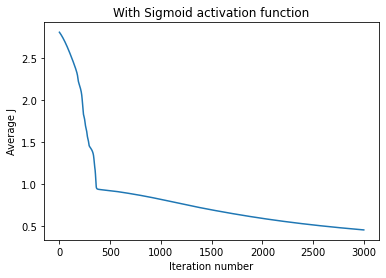

In [109]:
# plot the avg_cost_func 

plt.plot(all_costs_list)
# print(all_costs_list)
plt.title("With Sigmoid activation function")
# x label: "Iteration number"
plt.xlabel("Iteration number")
# y label: "Average J"
plt.ylabel("Average J")

plt.show()

## 5) Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [108]:
# get the prediction accuracy and print
y_pred = predict_y(W,b,X_test,3)

print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 87.20445062586927%
